<a href="https://colab.research.google.com/github/rameshbabuatreyu/Diabetes-Analysis/blob/master/House_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [51]:
# Importing Dependancies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [52]:
#Import Boston House price dataset
Boston=sklearn.datasets.load_boston()
Boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [53]:
#Creating dataframe


Boston_DF=pd.DataFrame(Boston.data,columns=Boston.feature_names)
Boston_DF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [54]:
# Adding target into dataframe
Boston_DF['PRICE']=Boston.target

In [55]:
Boston_DF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [57]:
Boston_DF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [58]:
Boston_DF.shape

(506, 14)

In [59]:
Boston_DF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [60]:
Boston_DF.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [61]:
#Understanding correlation between features in the dataset. 2 types of correlation - positive and negative. correlation b/w 2 variables.
correlation = Boston_DF.corr()

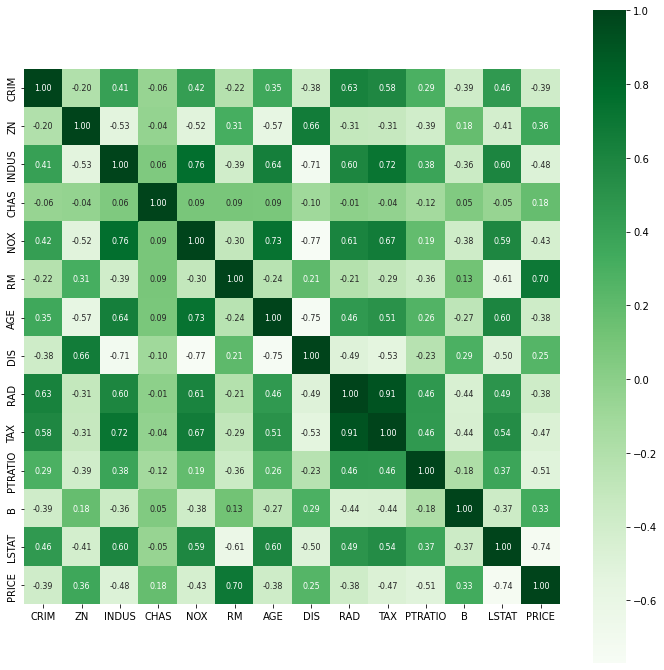

In [62]:
#Constructing a heatmap to understand better on correlation

plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Greens')
#cbar- color of the bar, square - representation, fmt- floating values, annotation - to display inside square, kws - size of text, cmap= color of Map

In [63]:
#Split the dataset
X=Boston_DF.drop(['PRICE'],axis=True)
Y=Boston_DF['PRICE']

In [64]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [65]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2 )# splitting data into train and test

In [67]:
print(X_train.shape,X_test.shape,X.shape)

(404, 13) (102, 13) (506, 13)


In [68]:
#Model Training

model=XGBRegressor()
model.fit(X_train,Y_train)

[14:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [69]:
#Model Evaluation - We cannot check accuracy for regression prob. 
#Prediction on trained data
training_data_pred=model.predict(X_train)
training_data_pred

array([23.360205 , 22.462858 , 20.84804  , 33.77895  , 15.333282 ,
       13.616525 , 21.71274  , 15.175322 , 11.724756 , 21.836252 ,
       16.08508  ,  7.52517  , 31.094206 , 48.56228  , 32.623158 ,
       20.546066 , 22.177324 , 20.500404 , 31.666502 , 20.551508 ,
       25.74269  ,  8.247894 , 45.200817 , 22.069397 , 20.698004 ,
       20.100042 , 19.873472 , 26.242834 , 23.39618  , 31.927258 ,
       21.493471 ,  9.280926 , 18.504272 , 21.87202  , 12.504413 ,
       10.578829 , 13.054951 , 23.541336 , 19.164755 , 15.888303 ,
       23.768887 , 28.454714 , 15.539753 , 18.049202 , 16.23671  ,
       14.08383  , 25.33273  , 17.575668 , 49.566467 , 16.990675 ,
       21.738977 , 32.935143 , 16.125738 , 22.45393  , 20.776966 ,
       20.042227 , 22.898897 , 38.124043 , 30.607079 , 32.607468 ,
       20.919416 , 47.348038 , 14.524615 ,  8.126455 , 19.581661 ,
        9.030508 , 26.462107 , 17.69918  , 20.546162 , 46.312218 ,
       39.689137 , 34.387108 , 22.11083  , 34.568977 , 24.8739

In [70]:
# Rsquared error, Mean Absolute error -  we are using it to check the predicted value from the original value(Y_train)
score_1 = metrics.r2_score(Y_train,training_data_pred) # Find variation b/w both of these value
score_2 = metrics.mean_absolute_error(Y_train,training_data_pred)
print("RSquared error which should be closer to zero : ",score_1) # if it is more than 1 or above our model is not performing good
print("Mean absolute error : ",score_2)

RSquared error which should be closer to zero :  0.9733349094832763
Mean absolute error :  1.145314053261634


In [71]:
# Prediction on Test Data
test_data_pred=model.predict(X_test)
test_data_pred


array([19.862686 , 20.875359 , 33.17797  , 27.382437 ,  8.670393 ,
       12.749035 , 24.892832 , 28.360075 , 24.255108 , 21.072632 ,
       26.47432  , 23.733467 , 19.937876 , 20.904943 , 11.981489 ,
       21.96157  , 18.912077 , 11.756731 ,  7.6664963, 15.348703 ,
       22.421118 , 20.452726 , 35.121113 , 18.995922 , 14.649773 ,
       19.7423   , 46.987373 , 31.679413 , 33.486717 , 19.149603 ,
       16.978365 , 19.986921 , 29.671926 , 25.908306 , 12.054155 ,
       19.783747 , 11.48538  , 20.736174 , 21.28781  , 22.159164 ,
       24.212786 , 14.06105  , 31.836473 ,  8.498605 , 19.9131   ,
       15.15852  , 34.853638 , 16.41293  , 32.33093  , 11.683373 ,
       29.010166 , 27.483522 ,  7.4060163, 36.29048  , 26.685335 ,
       19.16574  , 18.62919  , 18.594267 , 15.957146 , 20.692377 ,
       18.621147 , 20.87898  , 18.639454 , 31.751453 , 34.53461  ,
       24.462927 , 48.532074 , 25.695988 , 11.561405 , 22.441519 ,
       13.844913 ,  8.819357 , 18.711916 , 17.386942 , 25.3625

In [72]:
test_score_1 = metrics.r2_score(Y_test,test_data_pred)
test_score_2 = metrics.mean_absolute_error(Y_test,test_data_pred)

print(test_score_1)
print(test_score_2)

0.9115937697657654
1.9922956859364223
